In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ComputerPrice=pd.read_csv('C:\\Users\\mchil\\Downloads\\Python batch\\Python Pred Modeling All notebooks + Datasets\\Python Datasets\\Regression Datasets\\ComputerPricesData.csv')
ComputerPrice.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [3]:
ComputerPrice.drop_duplicates(inplace=True)

### Variable Analysis

* price: The Price of the computer
* speed: The speed
* hd: How much hard drive is present
* ram: How much ram is present in the computer
* screen: The screen size
* cd: Whether CD player is present or not
* multi: Are there multiple ports or not
* premium: If the computer premium quality
* ads: The ads value of the computer
* trend: The trend value of the computer




* Target :- price
* Predictors :-speed,hd,ram,screen,cd,multi,premium,ads,trend

### Analysing Destribution of Target 

<AxesSubplot:>

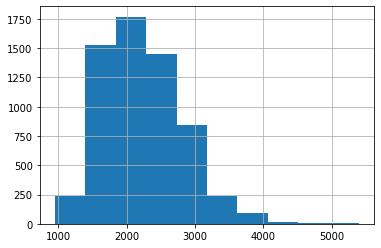

In [4]:
ComputerPrice['price'].hist()

####  Basic Data Exploration
* info()
* describe()
* nunique()

In [5]:
print(ComputerPrice.describe(include='all'),'\n',ComputerPrice.info(),'\n',ComputerPrice.nunique(),sep='\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6183 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6183 non-null   int64 
 1   speed    6183 non-null   int64 
 2   hd       6183 non-null   int64 
 3   ram      6183 non-null   int64 
 4   screen   6183 non-null   int64 
 5   cd       6183 non-null   object
 6   multi    6183 non-null   object
 7   premium  6183 non-null   object
 8   ads      6183 non-null   int64 
 9   trend    6183 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 531.4+ KB
              price        speed           hd          ram       screen    cd  \
count   6183.000000  6183.000000  6183.000000  6183.000000  6183.000000  6183   
unique          NaN          NaN          NaN          NaN          NaN     2   
top             NaN          NaN          NaN          NaN          NaN    no   
freq            NaN          NaN          NaN          NaN          NaN  

* Categorical Variables :- ram,screen,cd,multi,premium
* Continuous variables :- hd,ads,trend,speed
* target :- price

### Univariate Analysis

* Categorical Variable

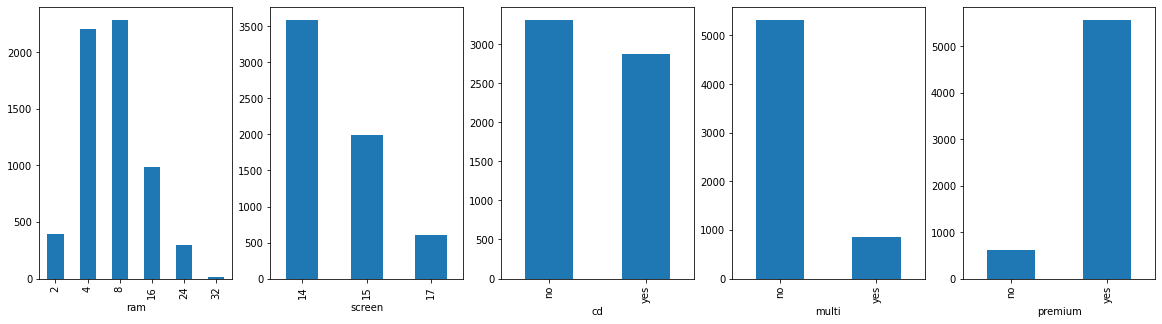

In [6]:
def plot_bar(df,cols):
    fig,subplot=plt.subplots(nrows=1,ncols=len(cols),figsize=(20,5))
    
    for i,j in zip (cols,range(len(cols))):
        df.groupby(i).size().plot(kind='bar',ax=subplot[j])

plot_bar(ComputerPrice,['ram','screen','cd','multi','premium'])

* Continuous Variable

array([[<AxesSubplot:title={'center':'hd'}>,
        <AxesSubplot:title={'center':'ads'}>],
       [<AxesSubplot:title={'center':'trend'}>,
        <AxesSubplot:title={'center':'speed'}>]], dtype=object)

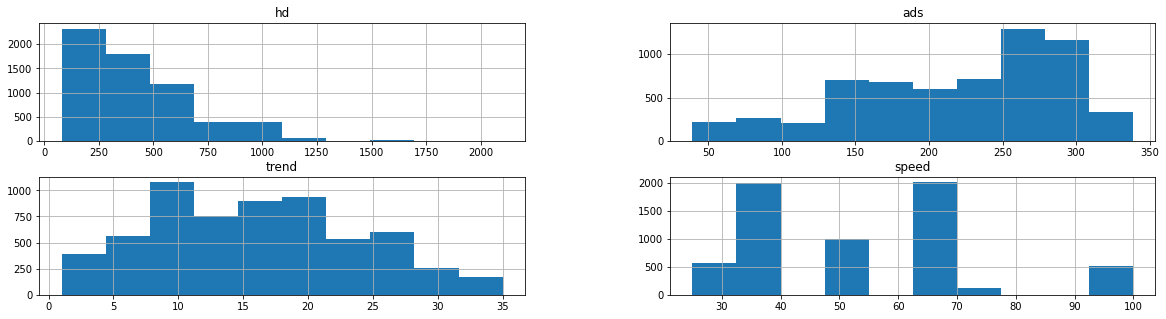

In [7]:
ComputerPrice.hist(['hd','ads','trend','speed'],figsize=(20,5))

### Bivariate Analysis

* continuous vs continuous



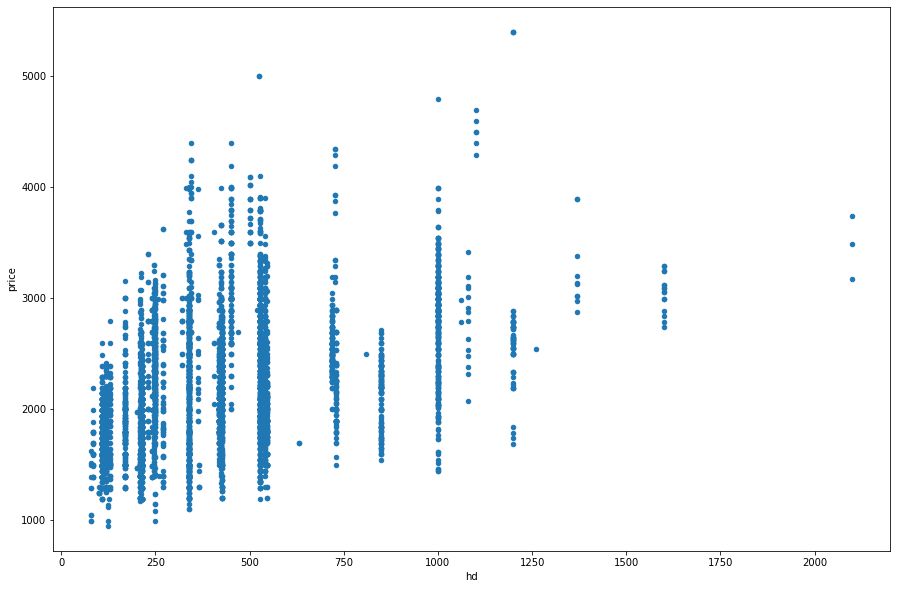

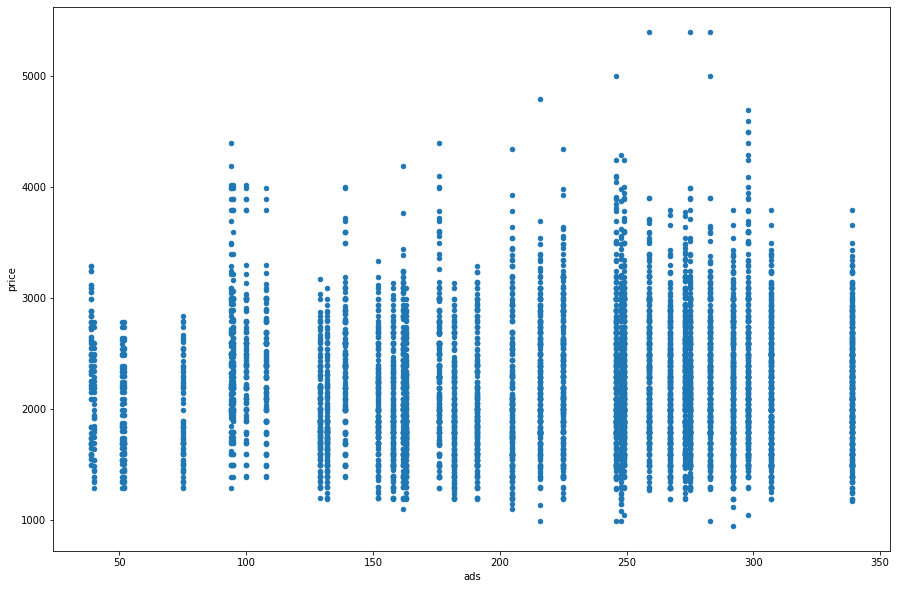

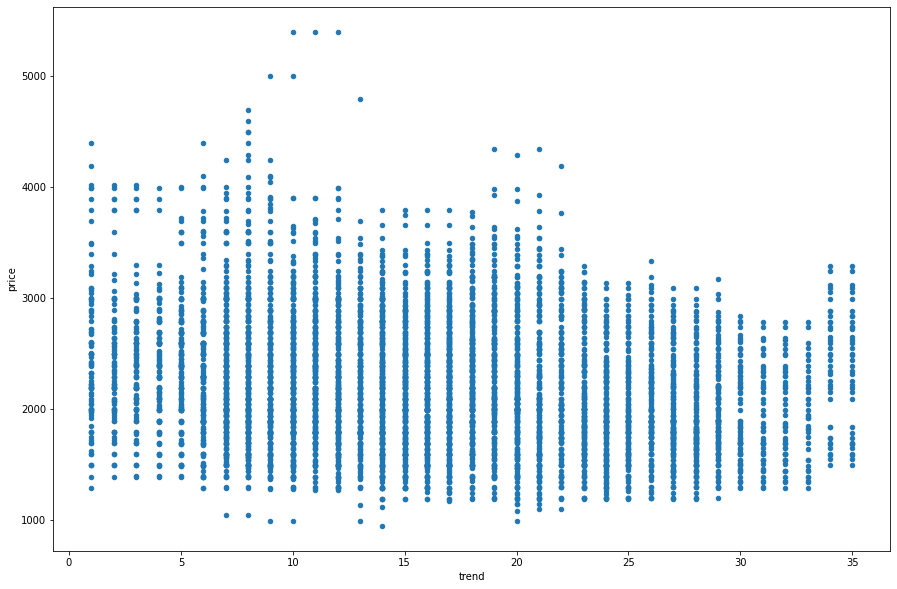

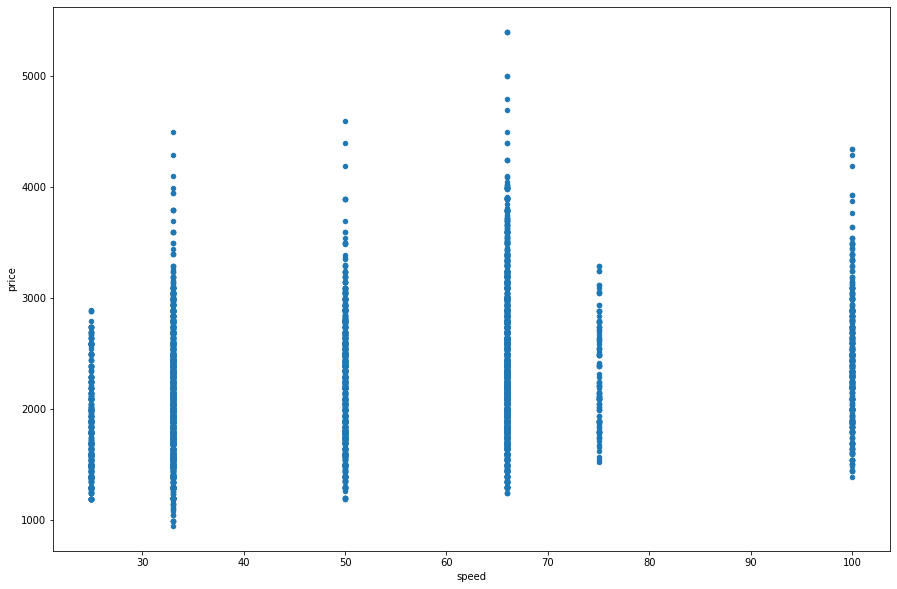

In [8]:

for i in [ 'hd','ads','trend','speed']:
    ComputerPrice.plot.scatter(x=i,y='price',figsize=(15,10))

In [9]:
Corr=ComputerPrice[[ 'hd','ads','trend','speed','price']].corr()
Corr

,hd,ads,trend,speed,price
hd,1.000000,-0.323342,0.577599,0.370356,0.428845
ads,-0.323342,1.000000,-0.320626,-0.214349,0.056434
trend,0.577599,-0.320626,1.000000,0.404830,-0.201662
speed,0.370356,-0.214349,0.404830,1.000000,0.298515
price,0.428845,0.056434,-0.201662,0.298515,1.000000


In [10]:
Corr['price'][abs(Corr['price'])>0.5]
# reducing the threshold to 0.2
Corr['price'][abs(Corr['price'])>0.2]

hd       0.428845
trend   -0.201662
speed    0.298515
price    1.000000
Name: price, dtype: float64

* categorical vs Continuous

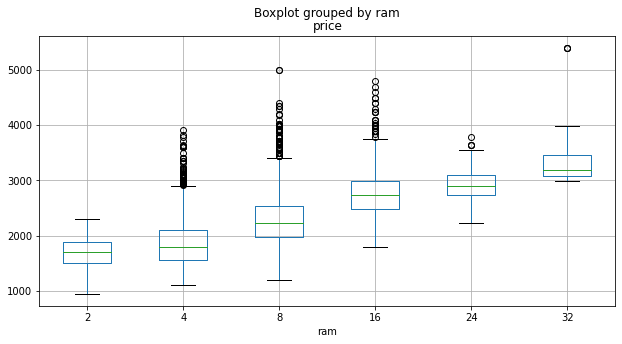

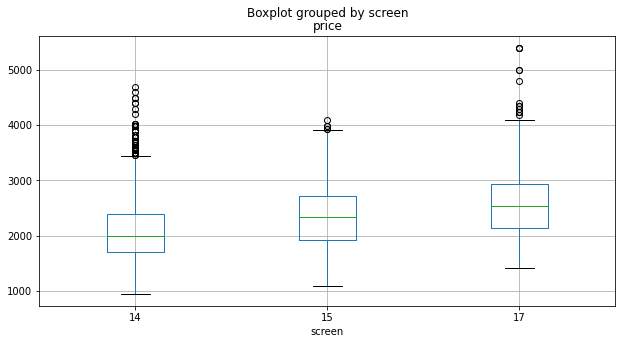

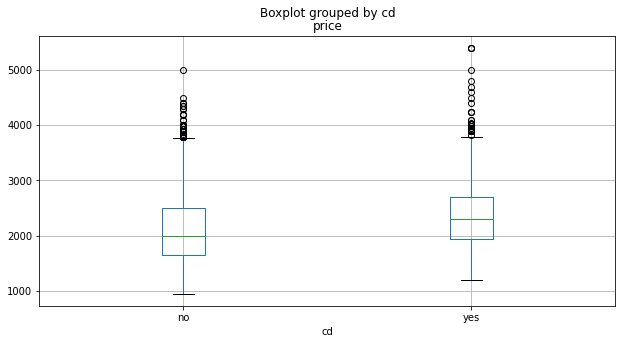

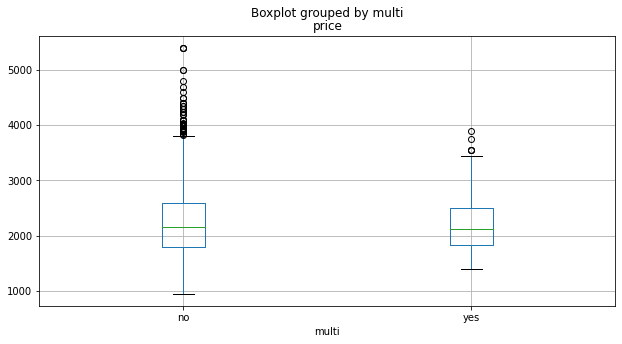

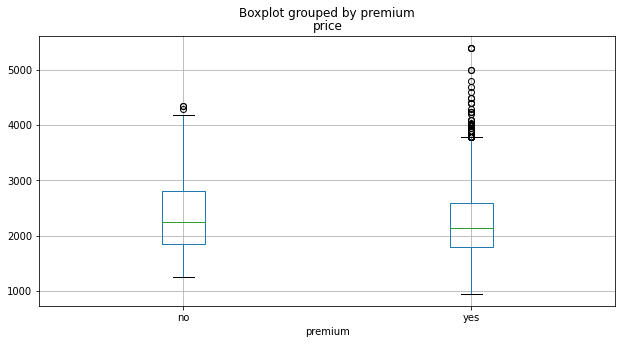

In [11]:
for i in  ['ram','screen','cd','multi','premium']:
    ComputerPrice.boxplot(column='price',by=i,figsize=(10,5))

#### ANNOVA Test

In [12]:
 # Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            # Accepting the H0 if the P value is more than 0.05
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [13]:
FunctionAnova(ComputerPrice,'price',['ram','screen','cd','multi','premium'])

##### ANOVA Results ##### 

ram is correlated with price | P-Value: 0.0
screen is correlated with price | P-Value: 1.2830206408407136e-129
cd is correlated with price | P-Value: 8.113565801487017e-55
multi is NOT correlated with price | P-Value: 0.19076936432204794
premium is correlated with price | P-Value: 2.7969949437607514e-10


['ram', 'screen', 'cd', 'premium']

* continuous selected:- hd,speed,trend
* categorical selected :- ram,screen,cd
* Target :- Price


### Extracting Final Predictors for ML

In [14]:
Predictors=['hd','speed','trend','ram','screen','cd']
Target='price'

DataML=ComputerPrice[Predictors+[Target]]
DataML.head()
# Predictors+Target

,hd,speed,trend,ram,screen,cd,price
0,80,25,1,4,14,no,1499
1,85,33,1,2,14,no,1795
2,170,25,1,4,15,no,1595
3,170,25,1,8,14,no,1849
4,340,33,1,16,14,no,3295


### Preprocessing Data for ML
#### Converting categorical to numerical

In [15]:
DataML['cd'].replace({'no':0,'yes':1},inplace=True)
# DataML['premium'].replace({'no':0,'yes':1},inplace=True)

In [16]:
DataML=pd.get_dummies(DataML)

#### Splitting Data into Train Test

In [24]:
from sklearn.model_selection import train_test_split

X=DataML[Predictors].values
y=DataML['price'].values


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)






(4328, 6)
(1855, 6)
(4328,)
(1855,)


In [25]:
y.shape

(6183,)

### Standardization/Normalization

In [26]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scale=MinMaxScaler()
trans=scale.fit(X)
X=trans.transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [27]:
X_train

array([[0.04455446, 0.10666667, 0.02941176, 0.06666667, 0.        ,
        0.        ],
       [0.22178218, 0.54666667, 0.82352941, 0.2       , 0.        ,
        1.        ],
       [0.32178218, 0.54666667, 0.85294118, 0.2       , 0.        ,
        1.        ],
       ...,
       [0.31683168, 0.10666667, 0.70588235, 0.46666667, 0.33333333,
        1.        ],
       [0.31683168, 1.        , 0.73529412, 0.46666667, 0.33333333,
        1.        ],
       [0.01336634, 0.33333333, 0.17647059, 0.        , 0.        ,
        0.        ]])

### Multiple Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score


LR=LinearRegression()

LR.fit(X_train,y_train)

print("R2 score of model is :- ",metrics.r2_score(y_train,LR.predict(X_train)))

predLR=LR.predict(X_test)

# ---------------------------------------------- #

TestResult=pd.DataFrame(X_test,columns=Predictors)
TestResult['price']=DataML['price']
TestResult['price_predicted']=np.round(predLR)

# APE
APE=(np.abs(y_test-predLR)/y_test)*100
# MAPE
MAPE=np.mean(APE)
# MedAPE
MedAPE=np.median(APE)

TestResult['APE']=APE

print(TestResult[['price','price_predicted','APE']])
print('Mean Model Accuracy is :-',100-MAPE)
print('Median model Accuracy is :-',100-MedAPE)

# --------------------------------------------------- #
# CrossValidation

def MAPE_score(orig,pred):
    APE=(np.abs(orig-pred)/orig)*100
    MAPE=np.mean(APE)
    return (100-MAPE)
    

scorer=make_scorer(MAPE_score,greater_is_better=True)

CV=cross_val_score(LR,X,y,cv=10,scoring=scorer)
print(CV)
print("Final mean accuracy of model is :- ",np.mean(CV))



R2 score of model is :-  0.6980942152989374
       price  price_predicted        APE
0     1499.0           2720.0  10.643587
1     1795.0           2757.0  15.615780
2     1595.0           2154.0   4.686385
3     1849.0           2233.0  11.921424
4     3295.0           1286.0  10.544573
...      ...              ...        ...
1850  2605.0           3024.0   6.295919
1851  2095.0           1523.0  18.064054
1852  2024.0           2383.0  19.458059
1853  3090.0           1655.0   5.106394
1854  2590.0           2105.0   6.200996

[1855 rows x 3 columns]
Mean Model Accuracy is :- 89.36034232373332
Median model Accuracy is :- 91.79161803002856
[84.09133145 86.35233024 89.10519629 88.3840626  89.25261394 90.78579113
 90.18618664 90.83984658 89.9581569  85.35920627]
Final mean accuracy of model is :-  88.43147220463047


### Decision Tree

R2 score of model is :-  0.8988475836613017

     price  price_predicted        APE
0  1499.0           2814.0  87.725150
1  1795.0           2365.0  31.754875
2  1595.0           2034.0  27.523511
3  1849.0           2362.0  27.744727
4  3295.0           1388.0  57.875569
Average Model Accuracy is :- 71.55734762934554
Median model accuracy is :- 76.84021543985637 

Feature Importances :- 



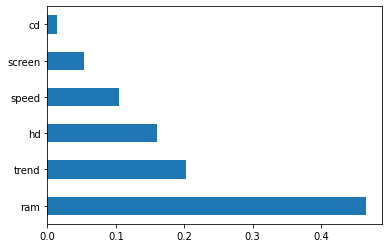

[89.71292113 91.64202887 92.37009639 88.83887404 88.568806   89.9520405
 87.86225382 91.11605619 92.09014441 80.64994017]
Final Mean Accuracy of model is :- 89.28031615065161


In [29]:
from sklearn.tree import DecisionTreeRegressor

DT=DecisionTreeRegressor(max_depth=10,criterion='mse')

DT.fit(X_train,y_train)

print("R2 score of model is :- ",metrics.r2_score(y_train,DT.predict(X_train)))

predDT=DT.predict(X_test)
predDT=predDT.reshape(predDT.shape[0],1)
# -------------------------------------- #

TestResultDT=pd.DataFrame(X_test,columns=Predictors)
TestResultDT['price']=DataML['price']
TestResultDT['price_predicted']=np.round(predDT)

# APE
# DT_APE=(np.abs(y_test-predDT)/y_test)*100
# # MAPE
# DT_MAPE=np.mean(DT_APE)
# # MedAPE
# DT_MedAPE=np.median(DT_APE)

TestResultDT['APE']=(np.abs(TestResultDT['price']-TestResultDT['price_predicted'])/TestResultDT['price'])*100

print('\n',TestResultDT[['price','price_predicted','APE']].head())
print("Average Model Accuracy is :-",100-TestResultDT['APE'].mean())
print("Median model accuracy is :-",100-TestResultDT['APE'].median(),'\n')

# -------------
print("Feature Importances :- \n")
features=pd.Series(DT.feature_importances_,index=Predictors)
features.nlargest(10).plot(kind='barh')
plt.show()
# ------------------------- #
#  Cross Validation

ScoreDT=make_scorer(MAPE_score,greater_is_better=True)
CrossVal=cross_val_score(DT,X,y,cv=10,scoring=ScoreDT)
print(CrossVal)
print("Final Mean Accuracy of model is :-",np.mean(CrossVal))

In [ ]:
from IPython.display import Image
from sklearn import tree
import pydotplus

Dot_data=tree.export_graphviz(DT,out_file=None,feature_names=Predictors,class_names=Target)

print(Dot_data)

graph=pydotplus.graph_from_dot_data(Dot_data)

Image(graph.create_png(),width=2000,height=2000)